# Brooks Tawil
# ECE: 445 Machine Learning for Engineers
## Mini Jupyter Exercise 3

### Gradient Descent

Consider the bivariate function $f : R^2 → R$ that is defined as follows:
<center>$f(w) = (w^2_1 + w_2 − 11)^2 + (w_1 + w^2_2 − 7)^2$</center><br/>

Provide an implementation of gradient descent that minimizes this function.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Before attempting to perform Gradient Descent, we need to compute the gradient. This is shown below, and implemented as a function in python which takes a single list of  $w_1$ and $w_2$ as arguments and outputs a list.

The gradient is represented as a 2-length vector formed from taking the partial derivatives of $f$ with respect to $w_1$ and $w_2$:

<center>$∇f(w) = [\frac{d}{dw_1}f(w) \frac{d}{dw_2} f(w)]$

$\frac{d}{dw_1} f(w) = 4w_1\left(w_1^2+w_2-11\right)+2\left(w_1+w_2^2-7\right) = 4w_1^3+4w_1w_2-42w_1+2w_2^2-14$

$\frac{d}{dw_2} f(w) = 2\left(w_1^2+w_2-11\right)+4w_2\left(w_1+w_2^2-7\right) = 4w_2^3-26w_2+4w_1w_2+2w_1^2-22$</center>

In [2]:
# Evaluate the function
def functionF(w1, w2):
    return (w1**2 + w2 - 11)**2 + (w1 + w2**2 - 7)**2

# Evaluate the gradient
def gradientF(w):
    dw1 = 4*w[0]*(w[0]**2 + w[1] - 11) + 2*(w[0] + w[1]**2 - 7)
    dw2 = 2*(w[0]**2) + 4 * w[1] * (w[0] + w[1]**2 - 7) + 2*w[1] - 22
    
    return [dw1, dw2]

1. Initialize gradient descent from $w^0 = [0, −4]^T$.

In [3]:
w_0 = [0, -4]

A simple Gradient Descent function is implemented below. It takes a $w$ vector as a list, $γ$, max number of iterations, and the desired precision as arguments. It returns the resulting $w*$ and the number of iterations as a tuple. this function will also print out if $w*$ could not be found in the alloted amount of iterations.

In [4]:
def gradientDescent(w_0, gamma, maxIters, precision):
    '''
    Input: 
        w_0: 1x2 list representing the starting position of gradient descent
        gamma: scalar value of the step size
        maxIters: the maximum amount of iterations
        precision: the desired precision to check completion against
    Output:
        w_star: A 1x2 list specifying the point the algorithm converged to
        iters: The amount of iterations needed to converge
        solutionPath: A list of all points visited on the path to finding a valid solution
    '''
    
    
    # Initialize variables for the loop
    w_star = w_0
    iters = 0
    solutionPath = [w_star]
    while (np.linalg.norm(gradientF(w_star)) > precision) and (iters < maxIters):
        # Compute the greadient at this point and then adjust w*
        gradient = gradientF(w_star)
        w_star = [w_star[0] - (gamma*gradient[0]), w_star[1] - (gamma*gradient[1])]
        solutionPath.append(w_star)
        iters = iters + 1
    
    # Print if iteration maximum is reached
    if (iters >= maxIters):
        print ('Failed to find w* within ' + str(maxIters) + ' iterations') 
    
    return (w_star, iters, solutionPath)

- Run the algorithm with step size $γ = 0.005$ and, if the algorithm converges, output $w^∗$ and the number of iterations it took the algorithm to converge.

In [5]:
w_star, iters, solutionPath = gradientDescent(w_0, 0.005, 10000, 10**-12)

In [6]:
# Print the results
print ('w = ' + str(w_star))
print ('It took ' + str(iters) + ' iterations to find this w')

w = [-3.7793102533777407, -3.28318599128616]
It took 93 iterations to find this w


- Run the algorithm with step size $γ = 0.01$ and, if the algorithm converges, output $w^∗$ and the number of iterations it took the algorithm to converge.

In [7]:
w_star, iters, solutionPath = gradientDescent(w_0, 0.001, 10000, 10**-12)

In [8]:
# Print the results
print ('w = ' + str(w_star))
print ('It took ' + str(iters) + ' iterations to find this w')

w = [-3.7793102533777394, -3.2831859912861576]
It took 523 iterations to find this w


By simply doubling the size of gamma, the amount of iterations dramatically increased from 93 to 523. This change is obviously not a linear relationship and with a larger step size

2. Run gradient descent with step size γ = 0.01 for four different initializations: (i) $w^0 = [0, −4]^T$ (ii) $w^0 = [0.5, −4]^T$ (iii) $w^0 = [0, 4]^T$ (iv)$w^0 = [0.5, 4]^T$

In [9]:
w_list = [0] * 4
iters_list = [0] * 4
solution_path_list = [0] * 4

# First initialization
w_0 = [0, -4]
w_list[0], iters_list[0], solution_path_list[0] = gradientDescent(w_0, 0.01, 10000, 10**-12)

# Second initialization
w_0 = [0.5, -4]
w_list[1], iters_list[1], solution_path_list[1] = gradientDescent(w_0, 0.01, 10000, 10**-12)

# Third initialization
w_0 = [0, 4]
w_list[2], iters_list[2], solution_path_list[2] = gradientDescent(w_0, 0.01, 10000, 10**-12)

# Fourth initialization
w_0 = [0.5, 4]
w_list[3], iters_list[3], solution_path_list[3] = gradientDescent(w_0, 0.01, 10000, 10**-12)

for i in range(len(w_list)):
    print ('The ' + str(i+1) + ' initialization returned ' + str(w_list[i]) + ' after ' + str(iters_list[i]) + ' iterations.')

The 1 initialization returned [-3.7793102533777447, -3.283185991286164] after 38 iterations.
The 2 initialization returned [3.584428340330489, -1.848126526964375] after 91 iterations.
The 3 initialization returned [-2.8051180869527297, 3.1313125182505717] after 41 iterations.
The 4 initialization returned [2.9999999999999876, 2.00000000000003] after 111 iterations.


When looking at the found solutions, it would appear that these are local minima. The function is a multivarible polynomial with roots of four, so the exitence of multiple minima would be expected. The fact that gradient descent, when starting at different positions, has different outputs leads to this conclusion as well.

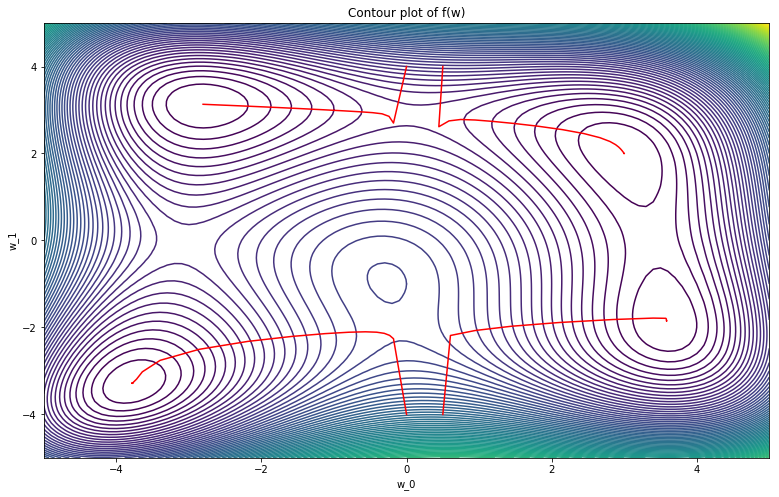

In [10]:
# Evaluate the function across the domain
x = np.arange(-5.0, 5.1, 0.1)
y = np.arange(-5.0, 5.1, 0.1)
X, Y = np.meshgrid(x, y)
Z = np.empty([len(x), len(y)])

for i in range(len(x)):
    for j in range(len(y)):
        Z[i][j] = functionF(x[i], y[j])    
                
plt.figure(figsize=(13,8))
plt.title('Contour plot of f(w)')
plt.xlabel('w_0')
plt.ylabel('w_1')
plt.contour(X, Y, Z.transpose(), 100)
for i in solution_path_list:
    plt.plot(np.transpose(i)[0], np.transpose(i)[1], '-r')
plt.show()


### Parameter Estimation

1. Use the scipy.stats.multivariate_normal module within the scipy package to generate $N$ realizations of a Gaussian random vector $X ∈ R^5$ with mean vector $µ = E[X] = [ −1, 0, 4, 1, 0.5 ]^T$ and covariance matrix $C = 2I$, where $I ∈ R^{5×5}$ denote the identity matrix. Here, we are interested in the following values of $N: N = 10^j, j = 1, . . . , 6$.


In [11]:
from scipy.stats import multivariate_normal

mean = [-1, 0, 4, 1, 0.5]
C = 2 * np.identity(5)
gaussian = multivariate_normal(mean, C)


- Obtain an estimate $µ'_N$ of the mean vector $µ$ of $X$ for each value of $N$ as follows: $µ'_N = \frac {1} {N} \sigma^N_{n=1} x_n$, where $x_n$ denotes the nth realization of $X$.

- Compute the instantaneous error between $µ'_N$ and the actual mean as follows: $e_N = ||µ'_N − µ||^2_2$

In [15]:
# Estimate the mean and calculate instantaneous error
meanEstimates = []
instantErrors = []

for i in range(1, 7):
    N = 10**i
    X = [0] * N
    # Get N iterations of Gaussian random vectors
    X = [gaussian.rvs() for _ in range(N)]
    meanEstimate = [0] * 5
    for j in range(5):
        meanEstimate[j] = float(sum([X[n][j] for n in range(N)])) / N
    
    instantError = np.square(np.linalg.norm(np.array(meanEstimate) - np.array(mean)))
    meanEstimates.append(meanEstimate)
    instantErrors.append(instantError)
    print ('N = ' + str(N) + '\n Estimated Mean = ' + str(meanEstimate) + ' Instantaneous Error = ' + str(instantError))

N = 10 Estimated Mean = [-1.0365728324626526, 0.3982832965162196, 3.601015803648868, 1.3182850754200093, 0.5500094895731682] Instantaneous Error = 0.42296188357861647
N = 100 Estimated Mean = [-0.825747485501479, -0.015438981304169928, 3.990374911807299, 1.0755779989674565, 0.5991013024364126] Instantaneous Error = 0.04622804534800322
N = 1000 Estimated Mean = [-1.077909243450682, 0.045780338507975436, 3.996637273449762, 0.9953771192482237, 0.49722448922392687] Instantaneous Error = 0.00820607202532738
N = 10000 Estimated Mean = [-0.9876572867429246, 0.008323582051238752, 4.003590554436009, 0.9752232040393559, 0.5122281578425537] Instantaneous Error = 0.0009979341321658293
N = 100000 Estimated Mean = [-1.006260240439515, 0.0006261880477110041, 3.998849747227751, 0.9872455528182466, 0.5017774684623244] Instantaneous Error = 0.00020674112031839636
N = 1000000 Estimated Mean = [-1.0019856896041235, 0.0010820742006701248, 3.998494303754496, 0.9983872911324351, 0.5005846383217722] Instantan

Provide a log-log plot of $e_N$ as a function of $N$; comment on the relationship between $e_N$ and $N$.

In [ ]:
import matplotlib.pyplot as plt
plt.loglog([10**i for i in range(1, 7)], errors)
plt.title("Instantaneous error")
plt.ylabel("Error")
plt.xlabel("N")
plt.show()

Using the logarithmic scale, the errpr is decreasing linearlly with the number of iterations. Since this is a logarithmic scale however, the relationship can be demonstrrated as follows:

<center>$e_N = N^{-k}$</center>

where $k∈R_{>0}$ and making the relationship between the error and $N$ inversely proportional. With larger N, the error drastically decreases.